In [76]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [77]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

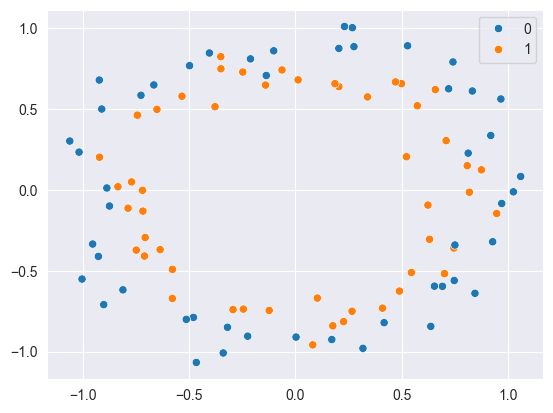

In [78]:
sns.scatterplot(x=X[:,0], y=X[:,1],hue=y)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [80]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/othmaneabderrazik/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, verbose=0)

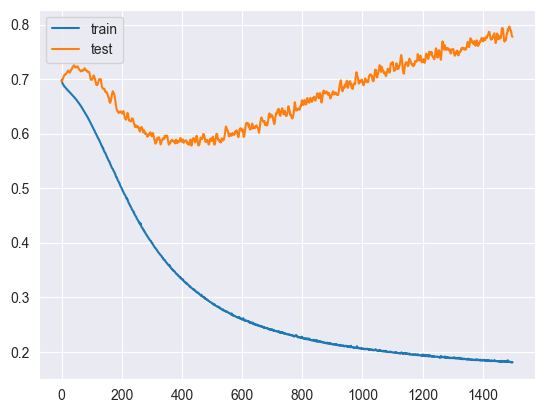

In [83]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 168us/step


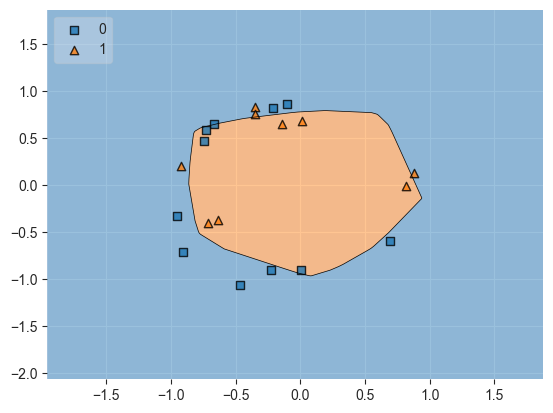

In [84]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [85]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
callback = EarlyStopping(
    monitor="val_loss", # metric to watch
    min_delta=0.0000001,  # minimum change to count as an improvement
    patience=20,    # number of epochs to wait before stopping after progress stalls
    verbose=1,  # displays a message when the callback stops training
    mode="auto",    # automatically detects if monitor should be decreasing (loss) or increasing (acc)
    baseline=None,  # training will stop if the model doesn't hit this specific value
    restore_best_weights=False  # whether to keep the weights from the final epoch or revert to the best one found
)

In [96]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, callbacks=callback)

Epoch 1/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.5862 - val_accuracy: 0.7000 - val_loss: 0.6700
Epoch 2/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8164 - loss: 0.5756 - val_accuracy: 0.7000 - val_loss: 0.6680
Epoch 3/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8305 - loss: 0.5688 - val_accuracy: 0.6500 - val_loss: 0.6673
Epoch 4/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7891 - loss: 0.5783 - val_accuracy: 0.6500 - val_loss: 0.6670
Epoch 5/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7852 - loss: 0.5776 - val_accuracy: 0.6500 - val_loss: 0.6658
Epoch 6/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8359 - loss: 0.5752 - val_accuracy: 0.6500 - val_loss: 0.6658
Epoch 7/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8141 - loss: 0.5682 - val_accuracy: 0.6500 - val_loss: 0.6676
Epoch 8/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7984 - loss: 0.5747 - val_accuracy: 0.6500 - val_loss

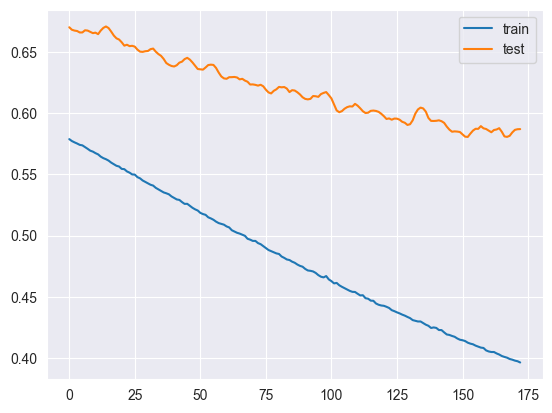

In [97]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 164us/step


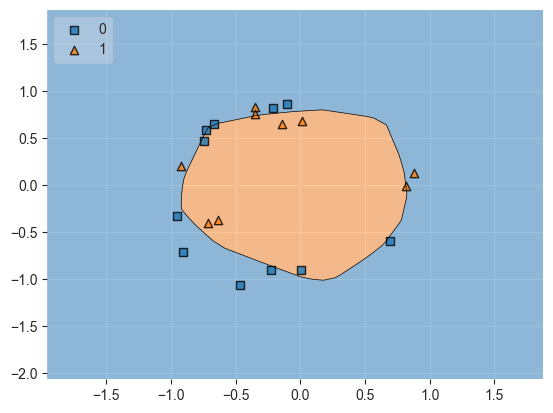

In [98]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()